## In this notebook, I am going to predict possibility of purchase  with:

**1. Logestic Regresssion**

**2. KNN Algorithms.**

**3. Support Vector Classifiers.**

**4. Naive Bayes Classifier.**

**5. Decision Tree.**

**6. Random Forest Classifier.**

To prepare This notebooks, I have taken reference from https://www.javatpoint.com/machine-learning. You can visit this to learn machine learing concets.

## Problem Statement: 
There is a dataset given which contains the information of various users obtained from the social networking sites. There is a car making company that has recently launched a new SUV car. So the company wanted to check how many users from the dataset, wants to purchase the car.

## Importing libraries

In [412]:
# For Data Manipulation and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Import Algorithims
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For Evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score, f1_score


## Import data

In [413]:
dataset = pd.read_csv("/kaggle/input/suv-data/suv_data.csv")
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


## Data Preprocessing and Visualization

In [414]:
dataset.shape

(400, 5)

In our data, there are 400 datapoints and 5 columns.

In [415]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In our data, `User ID` columns not contributing to target, so I'll drop this column for futher process.

In [416]:
dataset = dataset.drop(["User ID"],axis=1)
dataset

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [417]:
# Null value count
dataset.isna().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

We have no missing data, we are ready to processed further,

In [418]:
dataset.dtypes

Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

We want all data in numeric format, so I'm going to replace
* Male - 1
* Female  - 2

In [419]:
dataset["Gender"] = dataset.Gender.map({"Male":1,"Female":0})

In [420]:
dataset.Gender.value_counts()

Gender
0    204
1    196
Name: count, dtype: int64

In [421]:
dataset.dtypes

Gender             int64
Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

Now we have all data in int64 Datatypes.

In [422]:
dataset.describe()

,Gender,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000,400.000000
mean,0.490000,37.655000,69742.500000,0.357500
std,0.500526,10.482877,34096.960282,0.479864
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,29.750000,43000.000000,0.000000
50%,0.000000,37.000000,70000.000000,0.000000
75%,1.000000,46.000000,88000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


In [423]:
# Correlation matrix
dataset.corr()

,Gender,Age,EstimatedSalary,Purchased
Gender,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.073741,1.000000,0.155238,0.622454
EstimatedSalary,-0.060435,0.155238,1.000000,0.362083
Purchased,-0.042469,0.622454,0.362083,1.000000


From above we notice that there is positive correlation with `Age` and `Purchased`, This mean increase with age, purchase possibility increases.

<Axes: >

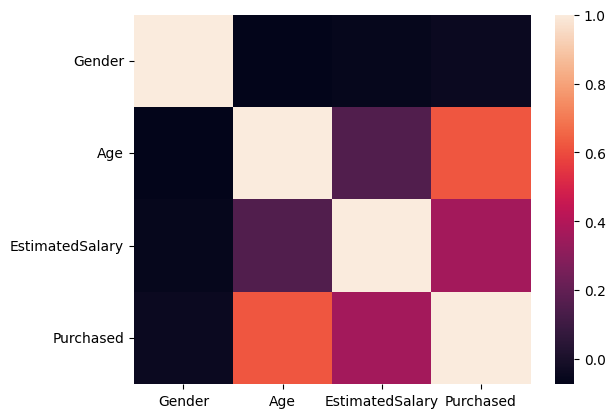

In [424]:
# Let's Visulize correlation matrix with help of heatmap
sns.heatmap(dataset.corr())

## Distributions of Features

* **Age**

Text(0, 0.5, 'Count')

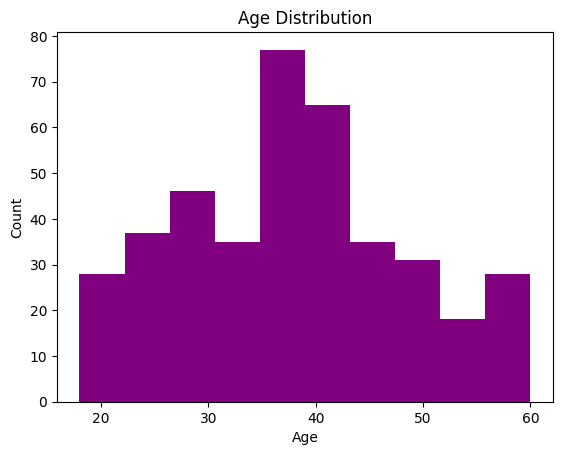

In [425]:
plt.figure
plt.hist(dataset.Age,color='purple')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")

* **Gender**

Text(0, 0.5, 'Count')

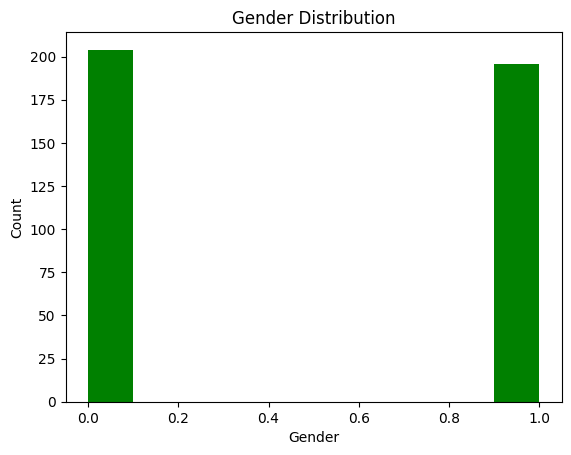

In [426]:
plt.figure
plt.hist(dataset.Gender,color='green')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")

* **Estimated Salary**

Text(0, 0.5, 'Count')

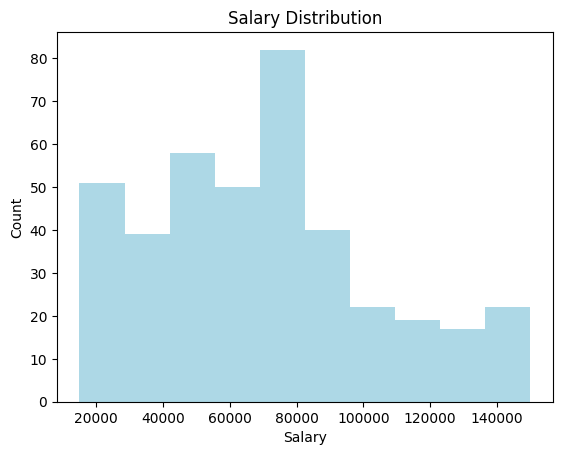

In [427]:
plt.figure
plt.hist(dataset.EstimatedSalary,color='lightblue')
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Count")

## Splitting Dataset into x any y
* x [features]: `Age`,`Salary`,`Gender`
* y [labels]: `Purchased`

In [428]:
x = dataset.drop(["Purchased"],axis=1)
y = dataset["Purchased"]

In [429]:
x

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [430]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [431]:
## Splitting dataset into trainning and Test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [432]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((300, 3), (100, 3), (300,), (100,))

I'll train data with 300 datapoints, test on 100 datapoints.

## Feature Scaling

In [433]:
sc = StandardScaler()
x_train = pd.DataFrame(sc.fit_transform(x_train))
x_test = pd.DataFrame(sc.fit_transform(x_test))

In [434]:
x_train

,0,1,2
0,-0.986754,1.892589,1.521894
1,-0.986754,0.125038,0.032132
2,1.013423,0.910616,-1.311575
3,1.013423,-1.347922,-1.486841
4,-0.986754,-0.169554,-0.581299
...,...,...,...
295,-0.986754,-1.347922,-1.253153
296,-0.986754,-1.151527,-1.019465
297,-0.986754,0.517827,1.843215
298,1.013423,0.125038,0.207398


Now our Data Preprocessing has completed.

# Training Model

# 1. Logestic Regression

* Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique. It is used for predicting the categorical dependent variable using a given set of independent variables.
* Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1.
* Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.

In [435]:
LR = LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [436]:
yLR = LR.predict(x_test)
yLR

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In [437]:
# Classfication Report
print(classification_report(y_test,yLR))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90        63
           1       0.93      0.68      0.78        37

    accuracy                           0.86       100
   macro avg       0.88      0.82      0.84       100
weighted avg       0.87      0.86      0.85       100



Here I'm creating function `eval_model`.
1. This function takes (model, y_true,y_preds) parameter.
2. It calculate precision, recall, f1, accuracy score.
3. This stores will precision, recall, f1, accuracy score in dictonary.
4. This function will print these score.

In [438]:
score = {}

In [439]:
def eval_model(model, y_true,y_preds):
    """
    Here I'm creating function `eval_model`. This function takes (model, y_true,y_preds) parameter.
    This stores will precision, recall, f1, accuracy score in dictonary,This function will print these score
    """
    prec = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 = f1_score(y_true,y_preds)
    acc = accuracy_score(y_true,y_preds)
    
    score[model] = [prec,recall,f1,acc]
    
    print(f"The Precision score of {model} model is {(prec*100):.2f}")
    print(f"The Recall score of {model} model is {(recall*100):.2f}")
    print(f"The f1 score of {model} model is {(f1*100):.2f}")
    print(f"The Accuracy of {model} model is {(acc*100):.2f}")  

In [440]:
# Evaluate Logistic Regression
eval_model("Log Regression",y_test,yLR)

The Precision score of Log Regression model is 92.59
The Recall score of Log Regression model is 67.57
The f1 score of Log Regression model is 78.13
The Accuracy of Log Regression model is 86.00


In [441]:
pd.DataFrame(score)

,Log Regression
0,0.925926
1,0.675676
2,0.781250
3,0.860000


Now we will create the **confusion matrix** here to check the accuracy of the  **classification** . To create it, we need to import the `confusion_matrix` function of the sklearn library.The function takes two parameters, mainly y_true( the actual values) and y_pred (the targeted value return by the classifier)

In [442]:
confusion_matrix(y_test,yLR)

array([[61,  2],
       [12, 25]])

# 2. K-Nearest Neighbor(KNN) Algorithm

* K-Nearest Neighbour is one of the **simplest Machine Learning algorithms** based on Supervised Learning technique.
* K-NN algorithm **assumes the similarity between the new case/data** and available cases and put the new case into the category that is most similar to the available categories.
* K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.
* K-NN algorithm can be used for Regression as well as for Classification but mostly it is used for the Classification problems.
* K-NN is a **non-parametric algorithm**, which means it does not make any assumption on underlying data.
* It is also called a **lazy learner algorithm** because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset.
* KNN algorithm at the training phase just stores the dataset and when it gets new data, then it classifies that data into a category that is much similar to the new data.


In [443]:
KN = KNeighborsClassifier()
KN.fit(x_train,y_train)

KNeighborsClassifier()

In [444]:
KN.score(x_test,y_test)

0.92

In [445]:
yKN = KN.predict(x_test)
yKN

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1])

In [446]:
# Classification Report
print(classification_report(y_test,yKN))


              precision    recall  f1-score   support

           0       0.95      0.92      0.94        63
           1       0.87      0.92      0.89        37

    accuracy                           0.92       100
   macro avg       0.91      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100



In [447]:
eval_model("KNN",y_test,yKN)

The Precision score of KNN model is 87.18
The Recall score of KNN model is 91.89
The f1 score of KNN model is 89.47
The Accuracy of KNN model is 92.00


In [448]:
# Confusion matrix
confusion_matrix(y_test,yKN)

array([[58,  5],
       [ 3, 34]])

# 3. Support Vector Machine Algorithm

* Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.

* The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

* SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine.


In [449]:
SV = SVC()
SV.fit(x_train,y_train)

SVC()

In [450]:
SV.score(x_test,y_test)

0.93

In [451]:
# Predict output for x_test data
ySV = SV.predict(x_test)
ySV

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1])

In [452]:
# classification Report
print(classification_report(y_test,ySV))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94        63
           1       0.88      0.95      0.91        37

    accuracy                           0.93       100
   macro avg       0.92      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



In [453]:
eval_model("SVM",y_test,ySV)

The Precision score of SVM model is 87.50
The Recall score of SVM model is 94.59
The f1 score of SVM model is 90.91
The Accuracy of SVM model is 93.00


In [454]:
# Confusion Matrix
confusion_matrix(y_test,ySV)

array([[58,  5],
       [ 2, 35]])

# 4.Naïve Bayes Classifier Algorithm

* Naïve Bayes algorithm is a supervised learning algorithm, which is based on **Bayes theorem** and used for solving classification problems.
* It is mainly used in **text classification** that includes a high-dimensional training dataset.
* Naïve Bayes Classifier is one of the simple and most effective Classification algorithms which helps in building the fast machine learning models that can make quick predictions.
* It is a probabilistic classifier, which means it **predicts on the basis of the probability** of an object.
* Some popular examples of Naïve Bayes Algorithm are **spam filtration, Sentimental analysis, and classifying articles.**

In [455]:
NB = GaussianNB()
NB.fit(x_train,y_train)

GaussianNB()

In [456]:
NB.score(x_test,y_test)

0.89

In [457]:
# Prediction of output for x_test data
yNB = NB.predict(x_test)
yNB

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In [458]:
# Classfication Report
print(classification_report(y_test,yNB))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92        63
           1       0.91      0.78      0.84        37

    accuracy                           0.89       100
   macro avg       0.89      0.87      0.88       100
weighted avg       0.89      0.89      0.89       100



In [459]:
eval_model("Naive Bayes",y_test,yNB)

The Precision score of Naive Bayes model is 90.62
The Recall score of Naive Bayes model is 78.38
The f1 score of Naive Bayes model is 84.06
The Accuracy of Naive Bayes model is 89.00


In [460]:
# Confusion matrix
confusion_matrix(y_test,yNB)

array([[60,  3],
       [ 8, 29]])

# 5. Decision Tree

* Decision Tree is a Supervised learning technique that can be used for **both classification and Regression problems**, but mostly it is preferred for solving Classification problems. It is a **tree-structured classifier**, where **internal nodes represent the features of a dataset, branches represent the decision rules** and **each leaf node represents the outcome.**
* In a Decision tree, there are two nodes, which are **the Decision Node and Leaf Node**. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.
* The decisions or the test are performed on the **basis of features** of the given dataset.
* It is a graphical representation for getting all the possible solutions to a problem/decision based on given conditions.
* It is called a decision tree because, similar to a tree, it **starts with the root node, which expands on further branches and constructs a tree-like structure.**
* In order to build a tree, we use the CART algorithm, which stands for Classification and Regression Tree algorithm.


In [461]:
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [462]:
DT.score(x_test,y_test)

0.88

In [463]:
# Prediction of output for x_test data
yDT = DT.predict(x_test)
yDT

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In [464]:
# Classfication Report
print(classification_report(y_test,yDT))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        63
           1       0.84      0.84      0.84        37

    accuracy                           0.88       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.88      0.88      0.88       100



In [465]:
eval_model("Desici.Tree",y_test,yDT)

The Precision score of Desici.Tree model is 83.78
The Recall score of Desici.Tree model is 83.78
The f1 score of Desici.Tree model is 83.78
The Accuracy of Desici.Tree model is 88.00


In [466]:
# Confusion Matrix
confusion_matrix(y_test,yDT)

array([[57,  6],
       [ 6, 31]])

# 6. Random Forest Classifier

* Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the **concept of ensemble learning**, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

* As the name suggests, "Random Forest is a classifier that contains **a number of decision trees** on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset." Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output.

* **The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting.**



In [467]:
RF = RandomForestClassifier()
RF.fit(x_train,y_train)

RandomForestClassifier()

In [468]:
RF.score(x_test,y_test)

0.91

In [469]:
# Prediction of output for x_test data
yRF = RF.predict(x_test)
yRF

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1])

In [470]:
# Classfication Report
print(classification_report(y_test,yRF))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93        63
           1       0.85      0.92      0.88        37

    accuracy                           0.91       100
   macro avg       0.90      0.91      0.90       100
weighted avg       0.91      0.91      0.91       100



In [471]:
eval_model("Rand. For",y_test,yRF)

The Precision score of Rand. For model is 85.00
The Recall score of Rand. For model is 91.89
The f1 score of Rand. For model is 88.31
The Accuracy of Rand. For model is 91.00


In [472]:
# Confusion Matrix
confusion_matrix(y_test,yRF)

array([[57,  6],
       [ 3, 34]])

# Comparison of all six algotithms.

In [473]:
score

{'Log Regression': [0.9259259259259259,
  0.6756756756756757,
  0.7812500000000001,
  0.86],
 'KNN': [0.8717948717948718, 0.918918918918919, 0.8947368421052632, 0.92],
 'SVM': [0.875, 0.9459459459459459, 0.9090909090909091, 0.93],
 'Naive Bayes': [0.90625, 0.7837837837837838, 0.8405797101449275, 0.89],
 'Desici.Tree': [0.8378378378378378,
  0.8378378378378378,
  0.8378378378378378,
  0.88],
 'Rand. For': [0.85, 0.918918918918919, 0.8831168831168831, 0.91]}

Let's create `performance` Dataframe with this score dict. 

In [474]:
performance = pd.DataFrame(score,index=["Precision","Recall","F1","Accuracy"])
performance

,Log Regression,KNN,SVM,Naive Bayes,Desici.Tree,Rand. For
Precision,0.925926,0.871795,0.875000,0.906250,0.837838,0.850000
Recall,0.675676,0.918919,0.945946,0.783784,0.837838,0.918919
F1,0.781250,0.894737,0.909091,0.840580,0.837838,0.883117
Accuracy,0.860000,0.920000,0.930000,0.890000,0.880000,0.910000


<Axes: >

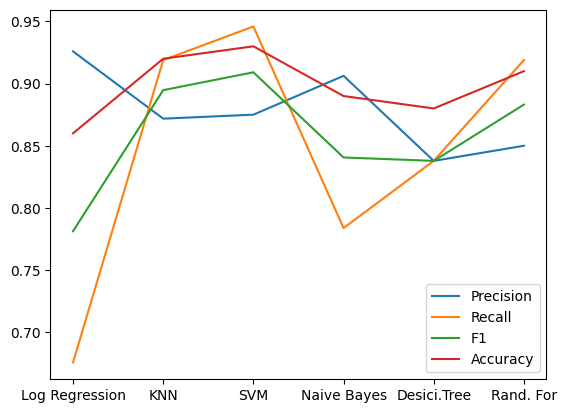

In [475]:
performance.T.plot()

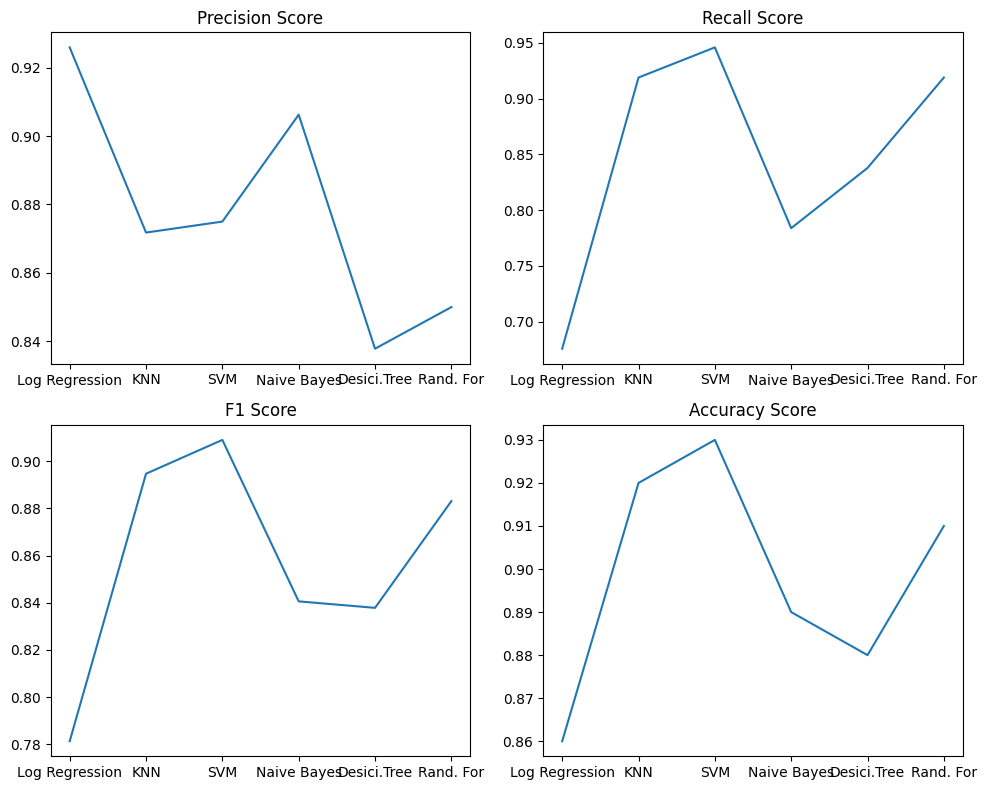

In [476]:
# Create a 2x2 grid of subplots
plt.figure(figsize=(10, 8))

# Subplot 1
plt.subplot(2, 2, 1)
plt.plot(performance.iloc[0,:])
plt.title('Precision Score')

# Subplot 1
plt.subplot(2, 2, 2)
plt.plot(performance.iloc[1,:])
plt.title('Recall Score')

# Subplot 1
plt.subplot(2, 2, 3)
plt.plot(performance.iloc[2,:])
plt.title('F1 Score')

# Subplot 1
plt.subplot(2, 2, 4)
plt.plot(performance.iloc[3,:])
plt.title('Accuracy Score')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


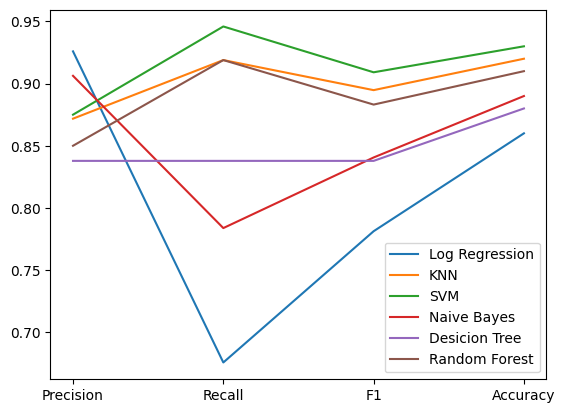

In [477]:
plt.plot(performance)
plt.legend(["Log Regression","KNN","SVM","Naive Bayes","Desicion Tree","Random Forest"])
plt.show()

# Conclusion
In this notebook, We have performs prediction by six fundametals algorithms,

#### Thank you for reading, If there any improvement, suggestion please comment, If you learn something then UPVOTE.